**0. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns

**1. Import Data**

In [2]:
data=pd.read_csv('solar_generation_data.csv')
data.head()

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,Jan,1,109°,85°,30.0,9,0.0,9.93
1,Jan,2,106°,71°,30.1,9,0.0,9.97
2,Jan,3,106°,81°,29.5,9,0.0,9.77
3,Jan,4,102°,83°,13.0,4,0.0,4.30
4,Jan,5,105°,80°,30.1,9,0.0,9.97


**2. Data Cleansing**

In [3]:
# Strip out degrees temp and convert string to float
data['Temp Hi']=data['Temp Hi'].str[:-1].astype('float');
data['Temp Low']=data['Temp Low'].str[:-1].astype('float');

In [4]:
# Replace empty cells with 0
data['Rainfall in mm'].fillna(0,inplace=True)

In [5]:
data.drop(['Month ','Day'],axis=1,inplace=True);

**3. Data Visualization**

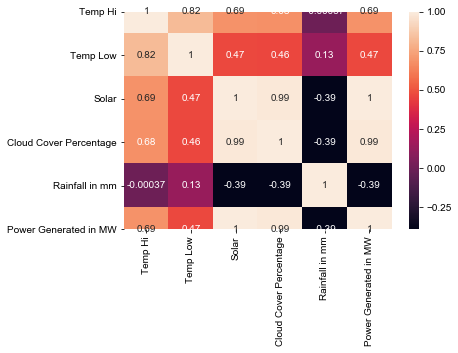

In [6]:
# Plot correlation matrix
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            annot=True);
sns.set(style='white',font_scale=1)

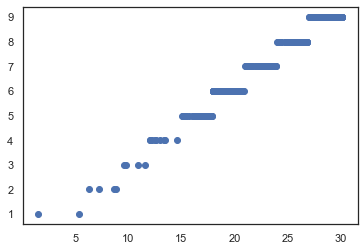

In [7]:
plt.scatter(data['Solar'],data['Cloud Cover Percentage'])

**NB:** Solar and Cloud Cover Percentage are highly correlated. Hence Solar will be dropped

In [8]:
data.drop('Solar',axis=1,inplace=True)

In [9]:
data.head()

,Temp Hi,Temp Low,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,109.0,85.0,9,0.0,9.93
1,106.0,71.0,9,0.0,9.97
2,106.0,81.0,9,0.0,9.77
3,102.0,83.0,4,0.0,4.30
4,105.0,80.0,9,0.0,9.97


In [10]:
data.describe()

,Temp Hi,Temp Low,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,91.687671,66.635616,6.972603,2.339726,7.488192
std,10.281531,10.750484,1.699811,15.256405,1.759069
min,66.000000,43.000000,1.000000,0.000000,0.500000
25%,83.000000,58.000000,6.000000,0.000000,6.130000
50%,93.000000,68.000000,7.000000,0.000000,7.550000
75%,99.000000,75.000000,9.000000,0.000000,8.940000
max,111.000000,94.000000,9.000000,161.500000,10.000000


**4. ML Modeling**

In [27]:
X=data.iloc[:, :-1] 
y=data.drop(data.iloc[:, :-1] ,axis=1)

In [28]:
# Split Data to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [29]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print('Accuracy: {}'.format(linear.score(X_test, y_test)))

Accuracy: 0.9482209604082115


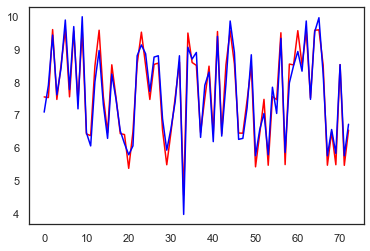

In [31]:
plt.plot(linear.predict(X_test),color='red')
plt.plot(y_test.values,color='blue')

In [32]:
filename = 'solar_model.sav'
pickle.dump(linear, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open('solar_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9482209604082115
